Author:

- Edgar Rodriguez

# Dataset chosen and objective of project

I chose a Heart Attack Analysis & Prediction Dataset: https://www.kaggle.com/code/yasirakyzl/heart-attack-ml-model-93-accuracy. The objective of this project will be to create a machine learning model that accurately predicts if a patient has a higher chance of having a heart attack based on the data.

# Approach taken



To accomplish this we will use <b>logistic regression</b> to classifty patients into two categories: low risk (0) and high risk (1). Let's start by loading the dataset and importing the necessary packages.


In [91]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

df = pd.read_csv('heart.csv')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values in the data. Let's proceed to clean the dataset by removing duplicates.

In [93]:
sum(df.duplicated())

1

There is only 1 duplicate, it might not affect our results too much but let's remove it to get the most accurate results.

In [94]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


Let's give a look at our dataset:

Age -> Age of the patient

Sex -> Sex of the patient

cp -> Chest Pain type chest pain type

Value 1: typical angina <br>
Value 2: atypical angina <br>
Value 3: non-anginal pain <br>
Value 4: asymptomatic <br>

trtbps -> resting blood pressure (in mm Hg)

chol -> cholestoral in mg/dl fetched via BMI sensor

fbs -> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg -> resting electrocardiographic results

Value 0: normal <br>
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>

thalach : maximum heart rate achieved

exng -> exercise induced angina (1 = yes; 0 = no)

oldpeak: number of ST depression induced by exercise relative to rest

slp: the slope of the peak exercise ST segment

Value 0 = unsloping <br>

Value 1 = flat <br>

Value 2 = downsloping <br>

caa -> number of major vessels (0-3)

thall -> thalassemia

Value 0 = null <br>

Value 1 = fixed defect <br>

Value 2 = normal <br>

Value 3 = reversable defect <br>

output -> 0= less chance of heart attack 1= more chance of heart attack - **Our target**

Here are some histograms to give us an idea of the distribution of each feature.

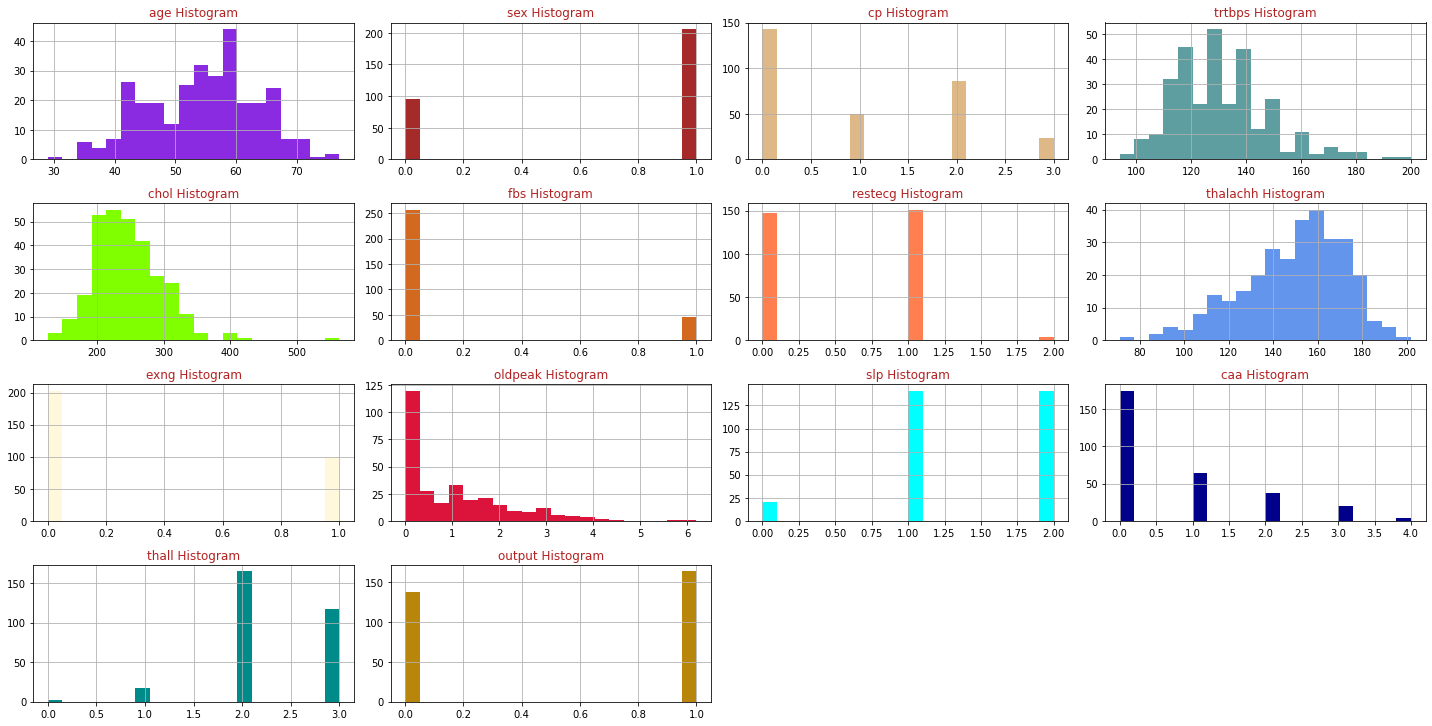

In [95]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(8, 4, i + 1)
    df[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

Let's continue by separating our DataFrame into features and target. Our target is the "output" column, and the features will be all other columns as well as scale our data.

In [96]:
y = df.output;
X = df.iloc[:, df.columns != 'output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Now let's build the model and training.

In [97]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 85.48%
The accuracy for the test set is 78.69%


In [98]:
prob = model.predict_proba(X_test_scaled[:20])
np.set_printoptions(precision=4, suppress=True)
prob

array([[0.9229, 0.0771],
       [0.8129, 0.1871],
       [0.9941, 0.0059],
       [0.311 , 0.689 ],
       [0.302 , 0.698 ],
       [0.965 , 0.035 ],
       [0.0339, 0.9661],
       [0.8765, 0.1235],
       [0.0277, 0.9723],
       [0.2631, 0.7369],
       [0.9316, 0.0684],
       [0.385 , 0.615 ],
       [0.9468, 0.0532],
       [0.0318, 0.9682],
       [0.016 , 0.984 ],
       [0.1076, 0.8924],
       [0.0661, 0.9339],
       [0.2732, 0.7268],
       [0.2419, 0.7581],
       [0.1276, 0.8724]])

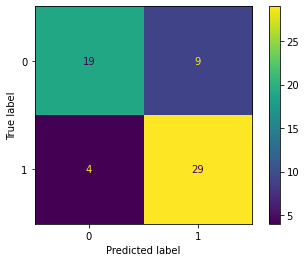

In [99]:
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Our accuracy score isn't as high as we want to. We also checked with 20 patients from the dataset to see if our model could classify accurately and many of them had similar probabilities of belonging to both targets. And our confusion matrix shows some false positives/negatives. To improve this we should find out if there is any column that could confuse our regressor and/or not significantly affect our output. For this we will use a **heatmap** and **xgboost** to test the relationship and impact of each variable in our dataset.

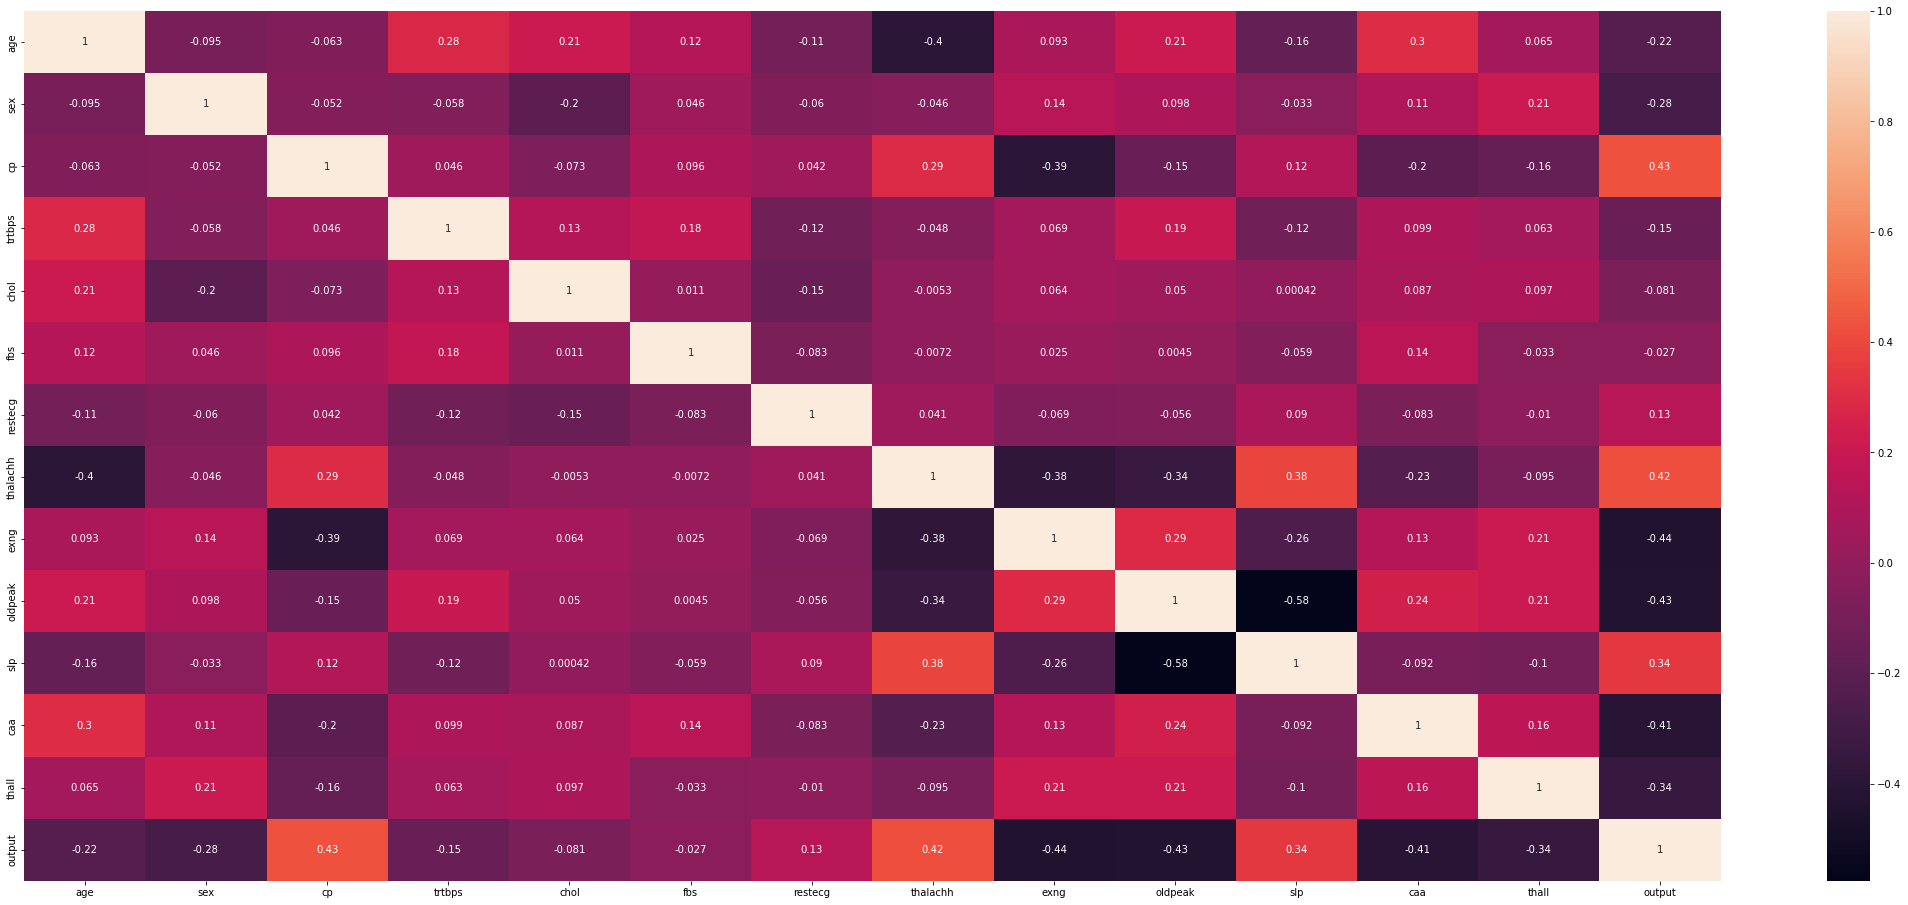

In [100]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

If we analyze this heatmap we can see that **output**  shows little to no correlation with **fbs** as well as with **chol**, which makes them candidates to be removed from our dataset. 

In [101]:
!pip install xgboost

<BarContainer object of 13 artists>

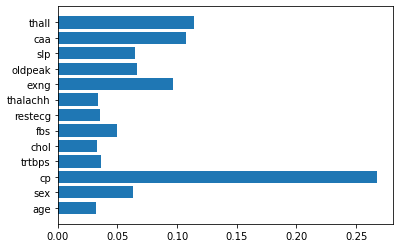

In [102]:
import xgboost
features = df.columns.tolist()[:-1]
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
xgb.feature_importances_
plt.barh(features, xgb.feature_importances_)

As we can see here, **fbs** has 0 importance in our regression model and **chol**, **thalach**, **restecg**, and **trtbps** have low importance. All of them also have a low score in our heatmap but **thalach**. Let's try removing them from our dataset except **thalach** because it seems to have high correlation (0.42) with our target based on our heatmap. Let's see if this increases our accuracy score.

In [103]:
df.drop('fbs', axis = 1, inplace=True)

In [104]:
df.drop('chol', axis = 1, inplace=True)

In [105]:
df.drop('restecg', axis = 1, inplace=True)

In [106]:
df.drop('trtbps', axis = 1, inplace=True)

Now let's create our new regression model.

In [107]:
y = df.output;
X = df.iloc[:, df.columns != 'output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 85.48%
The accuracy for the test set is 80.33%


In [109]:
prob = model.predict_proba(X_test_scaled[:20])
np.set_printoptions(precision=4, suppress=True)
prob

array([[0.7827, 0.2173],
       [0.8337, 0.1663],
       [0.9824, 0.0176],
       [0.3895, 0.6105],
       [0.3201, 0.6799],
       [0.9474, 0.0526],
       [0.0245, 0.9755],
       [0.8628, 0.1372],
       [0.0576, 0.9424],
       [0.0995, 0.9005],
       [0.8561, 0.1439],
       [0.3208, 0.6792],
       [0.9148, 0.0852],
       [0.0925, 0.9075],
       [0.0274, 0.9726],
       [0.0643, 0.9357],
       [0.1387, 0.8613],
       [0.205 , 0.795 ],
       [0.0571, 0.9429],
       [0.1034, 0.8966]])

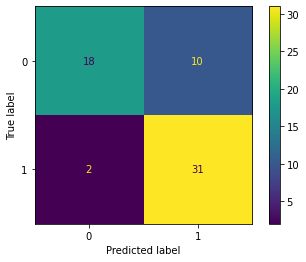

In [88]:
predictions = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# What were the results?

The accuracy score for the test set by 2% by removing some features based on the tools the I used. The regresor can predict if a patient is in high risk of having a heart attack with approximately 80% of accuracy. To visualize our results I used consufion matrices and probability arrays. 